In [1]:
%load_ext autoreload
%autoreload 2

## Planning or Learning

### Planning (The Transition Matrix is Given)

In the specific example from the CS234 slides (like the Mars Rover), we are performing Policy Evaluation or Planning. 
 
In this setting:
- The Model is known: We assume we have a perfect map of the environment.
- Matrix $P$ is Given: The transition probabilities and rewards are provided as inputs.
- Task: The goal is simply to "solve" the math to find the value of each state using the Bellman Equation. 
  
   



In [2]:
import numpy as np
import matplotlib.pyplot as plt


# --- MRP Setup ---
states = ["s1", "s2", "s3", "s4", "s5", "s6", "s7"]
n_states = len(states)
gamma = 0.9  # Discount factor

# Transition Matrix P [cite: 242]
P = np.array(
    [
        [0.6, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.4, 0.2, 0.4, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.4, 0.2, 0.4, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.4, 0.2, 0.4, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.4, 0.2, 0.4, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.4, 0.2, 0.4],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.6],
    ]
)

# Reward Vector R (+1 in s1, +10 in s7)
R = np.array([1, 0, 0, 0, 0, 0, 10])


In [3]:
# 2. Compute the Value Vector V using the analytic solution
# V = (I - gamma * P)^-1 * R
I = np.eye(n_states)
V_analytic = np.linalg.inv(I - gamma * P).dot(R)
V_analytic

array([ 6.91001094,  6.05168065,  6.87437276,  9.60661286, 15.00735653,
       24.57681034, 40.97315592])

In [4]:
# --- Iterative Learning and Data Capture ---

# Initialize V_0(s) = 0 for all s
V_iter = np.zeros(n_states)
value_history = [V_iter.copy()]

# as we increase the number of iterations, the value vector converges to the analytic solution
iterations = 200
for _ in range(iterations):
    # Bellman Equation: V_k = R + gamma * P * V_{k-1}
    V_iter = R + gamma * P.dot(V_iter)
    value_history.append(V_iter.copy())

value_history = np.array(value_history)
# Display results
print(f"State Values (Analytic):")
for s, v in zip(states, V_analytic):
    print(f"  {s}: {v:.4f}")

print(f"\nState Values (Iterative):")
for s, v in zip(states, V_iter):
    print(f"  {s}: {v:.4f}")

State Values (Analytic):
  s1: 6.9100
  s2: 6.0517
  s3: 6.8744
  s4: 9.6066
  s5: 15.0074
  s6: 24.5768
  s7: 40.9732

State Values (Iterative):
  s1: 6.9100
  s2: 6.0517
  s3: 6.8744
  s4: 9.6066
  s5: 15.0074
  s6: 24.5768
  s7: 40.9732


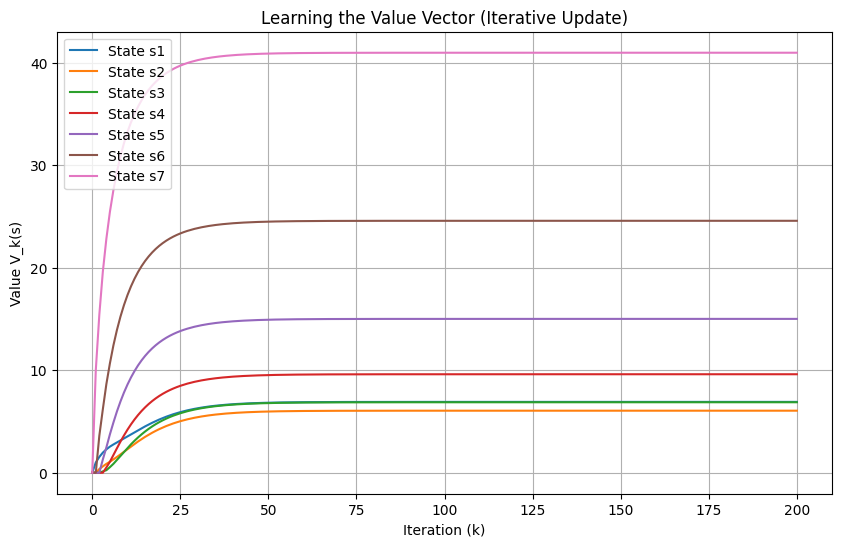

In [5]:
# --- Visualization ---

plt.figure(figsize=(10, 6))

# Plot the value of each state over time
for i in range(n_states):
    plt.plot(value_history[:, i], label=f"State {states[i]}")

plt.title("Learning the Value Vector (Iterative Update)")
plt.xlabel("Iteration (k)")
plt.ylabel("Value V_k(s)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# --- 2. Define Policy and Simulation ---


In [7]:
V = V_iter

# --- 2. Generate a Path ---


def get_next_state(current_idx, transition_matrix):
    return np.random.choice(
        range(len(transition_matrix)), p=transition_matrix[current_idx]
    )


# Path generation using the function
path = [0]
curr_idx = 0
while curr_idx != 6:
    curr_idx = get_next_state(curr_idx, P)
    path.append(curr_idx)

# --- 3. Animation Logic ---
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(range(n_states), [0] * n_states, "o-", color="lightgrey", markersize=20)
for i, val in enumerate(V):
    ax.text(i, 0.08, f"V={val:.1f}", ha="center", fontsize=9)

# Rover and Goal markers
ax.plot(6, 0, "o", color="gold", markersize=22)  # Goal
(rover,) = ax.plot([], [], "rs", markersize=15)  # Red Square Rover

ax.set_xlim(-0.5, 6.5)
ax.set_ylim(-0.5, 0.5)
ax.axis("off")


def update(frame):
    state_idx = path[frame]
    rover.set_data([state_idx], [0])  # Note the brackets around state_idx
    return (rover,)


# Create animation object
anim = FuncAnimation(fig, update, frames=len(path), interval=300, blit=True)

# --- IMPORTANT: Notebook Display Commands ---
plt.close(fig)  # Prevents an extra static plot from showing up
HTML(anim.to_jshtml())  # Generates the interactive player